J41112 Шваб Кирилл
# <center>Лабораторная работа 2</center>
<center>Вариант 15</center>

## Задание 1

Пусть акция стоит 1000\$. На рынке можно купить европейский Call опцион со Strike price
X = 970\$ по цене 50\$  с погашением через T = 1 год. У Васи, Пети и Коли есть вера и 1000\$ у
каждого, они хотят вложиться в эти акции. Посчитайте результаты их инвестиций (абсолютные
и в процентах), если Вася купит только один опцион, Петя - одну акцию, Коля - опционы на
все деньги, и цена акции через год будет

- 900\$  
- 940\$
- 1000\$
- 1050\$
- 1100\$

1. Для расчета финансового результата <strong>Васи</strong> необходимо воспользоваться следующей формулой:
$$max(S-X, 0)- 50\$ $$ 

2. Для расчета финансового результата для <strong>Пети</strong> необходимо воспользоваться следующей формулой: 
$$S_1-S_0$$ 


3. Для расчета финансового результата для <strong>Коли</strong> (20 опционов по 50\$ за каждый) необходимо воспользоваться следующей формулой: 
 $$max(S - X , 0)\cdot20-20\cdot50\$ $$ 
 

In [190]:
import pandas as pd
import numpy as np


def vasya_result(x, s, euro_call):
    return max(s-x, 0) - euro_call


def petya_result(s1, money):
    return s1 - money


def kolya_result(x, s, euro_call, money):
    return (money/euro_call) * (max(s - x, 0) - euro_call)


def exercise_1() -> pd.DataFrame:
    """Задание 1. Инвестиции"""
    money = 1000  # цена акции
    strike_price = 970  # цена экспирации
    euro_call = 50  # цена за опцион
    spot_prices = np.array([900, 940, 1000, 1050, 1100]
                           )  # цены акций через год

    # значения для Васи
    vasya = np.array([vasya_result(strike_price, s, euro_call)
                     for s in spot_prices])
    # значения для Пети
    petya = np.array([petya_result(s1, money) for s1 in spot_prices])
    # значения для Коли
    kolya = np.array([kolya_result(strike_price, s, euro_call, money)
                     for s in spot_prices])

    # Совместные результаты
    result_absolute = vasya + petya + kolya
    result_relative = np.round(100 * result_absolute / (3 * money), 2)

    book = {'Цена акции': spot_prices,
            'Вася': vasya,
            'Петя': petya,
            'Коля': kolya,
            'Совместный абсолютный результат': result_absolute,
            'Совместный относительный результат, %': result_relative}
    return pd.DataFrame(book)


exercise_1()


,Цена акции,Вася,Петя,Коля,Совместный абсолютный результат,"Совместный относительный результат, %"
0,900,-50,-100,-1000.0,-1150.0,-38.33
1,940,-50,-60,-1000.0,-1110.0,-37.00
2,1000,-20,0,-400.0,-420.0,-14.00
3,1050,30,50,600.0,680.0,22.67
4,1100,80,100,1600.0,1780.0,59.33


## Задание 2
Пусть цена европейского Put опциона с X = 500\$ равна 3\$, а текущая цена акции pавна
S = 502\$. Найдите цену европейского Call опциона с тем же страйком, если $r = 5%$ и $T −t = 1$.
Ответ округлите до целых.

Цены Европейских Put и Call опционов с одинаковыми параметрами связаны формулой: $$C-P=S(t)-Xe^{-r(T-t)}$$
$$C = P + S(t)-Xe^{-r(T-t)}$$

In [191]:
from math import exp


def exercise_2():
    """Задание 2. Найти Put опцион из уравнения"""
    x = 500  # страйк цена
    r = 5  # процент чего?
    dt = 1  # время для исполнения
    s_t = 502  # форвардная или не форвардная цена ?
    put = 3  # цена за пут опцион
    euro_call = put + s_t - x * exp(-(r/100)*dt)
    return round(euro_call)


print(f'Цена Европейского Put опциона = {exercise_2()}$')


Цена Европейского Put опциона = 29$


## Задание 3



#### a) Для Европейских опционов построить графики зависимостей:
 - Цен и payoff-ов от цены базового актива
 - $∆$,$Γ$, $Θ$, $Vega$, $ρ$ от цены базового актива
 - <strong>Put-Call parity</strong>


#### b) Пронаблюдать зависимость цены Европейского опциона от $T-t$, $r$ от $σ$ , сравнить с Греками.

### A) Для европейских опционов построим цены опционов и payoff от цен 

#### Для Call и Put опционов формулы cоответственно:
$$
C(S, t) = N(d_1)S - N(d_2)Ke^{-r(T-t)}
$$

$$
P(S, t) = N(-d_2)Xe^{-r(T-t)} - N(-d_1)S
$$

$$
d_1 = \frac{1}{\sigma\sqrt{T-t}}\Bigl[ln\Bigl(\frac{S_t}{k}\Bigr) + \Bigl(r + \frac{\sigma^2}{2}\Bigr)(T-t)\Bigr]  $$
$$d_2 = d_1 - \sigma\sqrt{T-t}$$

- $S$ - текущая цена базисной акции
- $N(x)$ - 
- $K$ - цена исполнения опциона
- $r$ - безрисковая процентная ставка
- $T - t$ - время до истечения опциона
- $\sigma$ - волатильность 

In [192]:
import math
from scipy import stats
import matplotlib.pyplot as plt

STRIKE_PRICE = 100
RANGE_VALUE = 10
R = 0.004
SIGMA = 0.03
T = 4
D = 0
N = stats.norm.cdf 
N_ = stats.norm.pdf


Распишем функции для Fair Value и Payoff

In [193]:
# Расчет pay-off для call
def payoff_call(s, x=STRIKE_PRICE):
    return max(s - x, 0)

# Расчет pay-off для put
def payoff_put(s, x=STRIKE_PRICE):
    return max(x - s, 0)

# Расчет цены для call опциона
def fair_value_call(s, r=R, x=STRIKE_PRICE, t=T,sigma = SIGMA):
    return N(d1(s, t=t, r=r, x=x,sigma = sigma))*s \
        - N(d2(s, r=r, x=x, t=t, sigma=sigma)) * x * exp(-r * t)

# Расчет цены для put опциона
def fair_value_put(s, r=R, x=STRIKE_PRICE, t=T, sigma=SIGMA):
    return N(-d2(s, r=r, x=x, t=t, sigma=sigma))*x\
        * exp(-r * t) - N(-d1(s, t=t, r=r, x=x,sigma = sigma))*s


def d1(s, r=R, x=STRIKE_PRICE, t=T, sigma=SIGMA):
    return (math.log(s/x) + (r + (sigma**2)/2) * t)/(sigma * math.sqrt(t))


def d2(s, r=R, x=STRIKE_PRICE, t=T, sigma=SIGMA):
    return d1(s, r=r, x=x, t=t, sigma=sigma) - sigma * math.sqrt(t)

Запишем значения Fair Value и Payoff в списки

In [194]:
# Интервал изменения цены
interval = np.linspace(STRIKE_PRICE-RANGE_VALUE,
                       STRIKE_PRICE+RANGE_VALUE, num=1000)
# Payoff
payoff_call_arr = np.array([payoff_call(s) for s in interval])
payoff_put_arr = np.array([payoff_put(s) for s in interval])
# Fair values
fair_value_put_arr = np.array([fair_value_put(s) for s in interval])
fair_value_call_arr = np.array([fair_value_call(s) for s in interval])


Отобразим на графиках Fair Value и Payoff

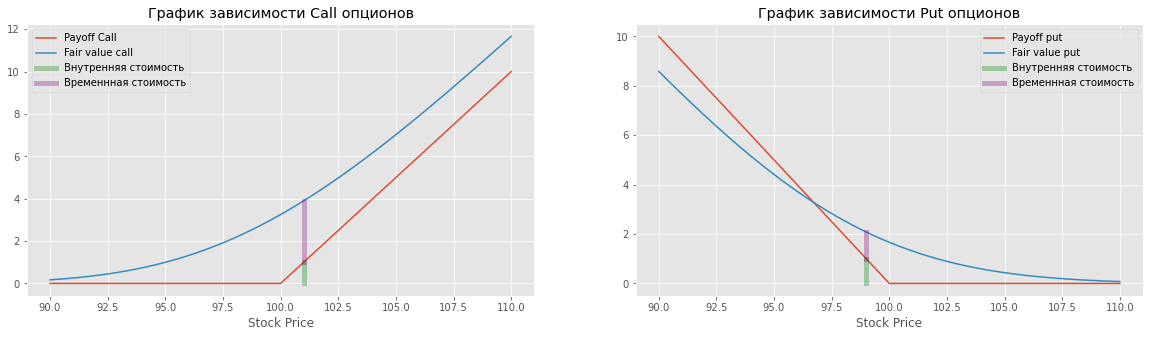

In [195]:
def draw_graphics():
    global interval
    plt.figure(figsize=(20, 5))
    plt.style.use('ggplot')
    # Call
    plt.subplot(1, 2, 1)
    plt.title('График зависимости Call опционов')
    plt.plot(interval, payoff_call_arr, label='Payoff Call')
    plt.plot(interval, fair_value_call_arr, label='Fair value call')
    plt.xlabel('Stock Price')
    # временная и внутреняя стоимость
    point = STRIKE_PRICE + 0.1* RANGE_VALUE
    plt.plot([point,point],[0,payoff_call(point)],
    linewidth = 5, color = 'green',alpha=0.3,label = 'Внутренняя стоимость')
    plt.plot([point,point],[payoff_call(point),fair_value_call(point)],
    linewidth = 5, color ='purple',alpha=0.3,label = 'Временнная стоимость')
    plt.legend(loc='best')
    # Put
    plt.subplot(1, 2, 2)
    plt.title('График зависимости Put опционов')
    plt.plot(interval, payoff_put_arr, label='Payoff put')
    plt.plot(interval, fair_value_put_arr, label='Fair value put')
    plt.xlabel('Stock Price')
    # временная и внутреняя стоимость
    point = STRIKE_PRICE - 0.1* RANGE_VALUE
    plt.plot([point,point],[0,payoff_put(point)],
    linewidth = 5, color = 'green',alpha=0.3,label = 'Внутренняя стоимость')
    plt.plot([point,point],[payoff_put(point),fair_value_put(point)],
    linewidth = 5, color ='purple',alpha=0.3,label = 'Временнная стоимость')
    plt.legend(loc='best')
draw_graphics()


Исследуем сall и put опционы на $\sigma$

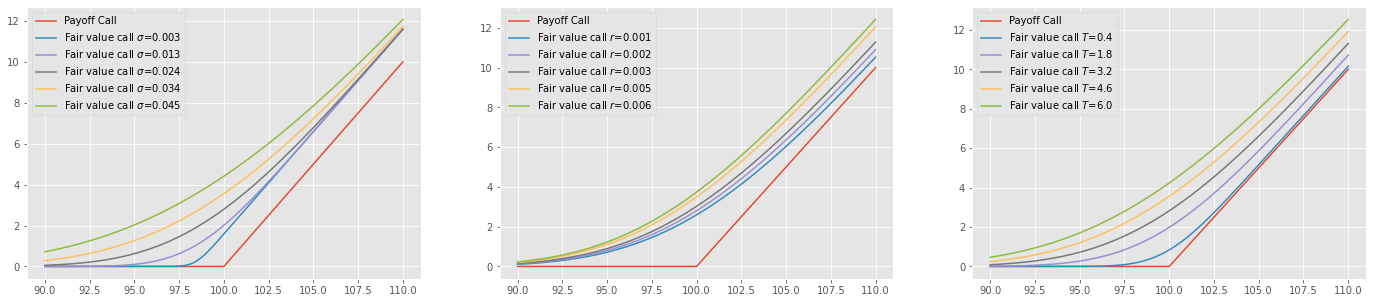

In [225]:
def research_fairvalue_show():
    """Изменение функций в зависимости от параметров"""
    # укажем интервалы для изменения параметров
    sigma = np.round(np.linspace(SIGMA*0.1, SIGMA*1.5, num=5), 3)
    r = np.round(np.linspace(R*0.2, R*1.5, num=5), 3)
    t = np.round(np.linspace(T*0.1, T*1.5, num=5), 3)
    # Изменение от sigma
    plt.figure(figsize=(24, 5))
    plt.subplot(1, 3, 1)
    plt.plot(interval, payoff_call_arr, label='Payoff Call')
    for i in sigma:
        fair_call_arr = [fair_value_call(s, sigma=i) for s in interval]
        plt.plot(interval, fair_call_arr,
                 label=f'Fair value call $\sigma$={i}')
    plt.legend(loc='best')
    # Изменение от r
    plt.subplot(1, 3, 2)
    plt.plot(interval, payoff_call_arr, label='Payoff Call')
    for i in r:
        fair_call_arr = [fair_value_call(s, r=i) for s in interval]
        plt.plot(interval, fair_call_arr, label=f'Fair value call $r$={i}')
    plt.legend(loc='best')
    # Изменение от T
    plt.subplot(1, 3, 3)
    plt.plot(interval, payoff_call_arr, label='Payoff Call')
    for i in t:
        fair_call_arr = [fair_value_call(s, t=i) for s in interval]
        plt.plot(interval, fair_call_arr, label=f'Fair value call $T$={i}')
    plt.legend(loc='best')


research_fairvalue_show()


### Построение греков
- описание для самих греков [здесь](https://www.zerich.com/article/Greki/)

Дельта — показывает, насколько изменится премия при увеличении цены базового актива на один пункт. Для опциона колл Дельта будет положительной, а для пута — отрицательной.

Гамма — показывает, насколько изменится Дельта при увеличении цены базового актива на один пункт. Используется для определения изменчивости Дельты.

Вега — показывает, насколько изменится премия при увеличении вмененной волатильности на один пункт. Другими словами, значение Веги отражает, насколько более ценным будет опцион при росте волатильности.

Тета — показывает, насколько изменится премия при увеличении срока до экспирации на один день. Соответственно, отрицательное значение Теты будет показывать, насколько изменится премия при уменьшении времени до экспирации на один день.

Ро — показывает, насколько изменится премия при увеличении безрисковой процентной ставки на один пункт. Как правило, редко используется вследствие слабого влияния на размер премии.



Напишем функции для вычисления <strong>Greek</strong>

In [199]:
# Дельта для call и put на выбор
def delta(s, r=R, x=STRIKE_PRICE, t=T, sigma=SIGMA, mode='call'):
    if mode == 'call':
        return math.exp(-D*t) * N(d1(s, r=r, x=x, t=t, sigma=sigma))
    elif mode == 'put':
        return math.exp(-D*t) * (N(d1(s, r=r, x=x, t=t, sigma=sigma)) - 1)

# Гамма


def gamma(s, r=R, x=STRIKE_PRICE, t=T, sigma=SIGMA,):
    return (math.exp(-D*t)*N_(d1(s, r=r, x=x, t=t, sigma=sigma)))/(sigma*s*math.sqrt(t))

# Тета для call и put на выбор


def tetha(s, r=R, x=STRIKE_PRICE, t=T, sigma=SIGMA, mode='call'):
    if mode == 'call':
        return -(sigma*s*math.exp(-D*t)*N_(d1(s, r=r, x=x, t=t, sigma=sigma)))/(2*math.sqrt(t))
        +(D*s*N(d1(s, r=r, x=x, t=t, sigma=sigma))*math.exp(-D*t))
        -(r*x*math.exp(-r*t)*N(d2(s, r=r, x=x, t=t, sigma=sigma)))
    elif mode == 'put':
        return -(sigma*s*math.exp(-D*t)*N_(-d1(s, r=r, x=x, t=T, sigma=sigma)))/(2*math.sqrt(t))
        -(D*s*N(-d1(s, r=r, x=x, t=t, sigma=sigma))*math.exp(-D*t))
        +(r*x*math.exp(-r*t)*N(-d2(s, r=r, x=x, t=t, sigma=sigma)))

# Vega для call и put на выбор


def vega(s, r=R, x=STRIKE_PRICE, t=T, sigma=SIGMA):
    return s*math.sqrt(t)*math.exp(-D*t)*N(d1(s, r=r, x=x, t=t, sigma=sigma))

# Ро для call и put на выбор


def ro(s, r=R, x=STRIKE_PRICE, t=T, sigma=SIGMA, mode='call'):
    if mode == 'call':
        return x*t*math.exp(-r*t)*N(d2(s, r=r, x=x, t=t, sigma=sigma))
    elif mode == 'put':
        return -x*t*math.exp(-r*t)*N(-d2(s, r=r, x=x, t=t, sigma=sigma))


Получим значения греков и запишем их в списки

In [200]:
# Дельта
delta_call_arr = [delta(s, mode='call') for s in interval]
delta_put_arr = [delta(s, mode='put') for s in interval]

# Гамма
gamma_arr = [gamma(s) for s in interval]

# Вега
vega_arr = [vega(s) for s in interval]

# Тетта
tetha_call_arr = [tetha(s, mode='call') for s in interval]
tetha_put_arr = [tetha(s, mode='put') for s in interval]

# Ро
ro_call_arr = [ro(s, mode='call') for s in interval]
ro_put_arr = [ro(s, mode='put') for s in interval]


Отобразим греки на графиках

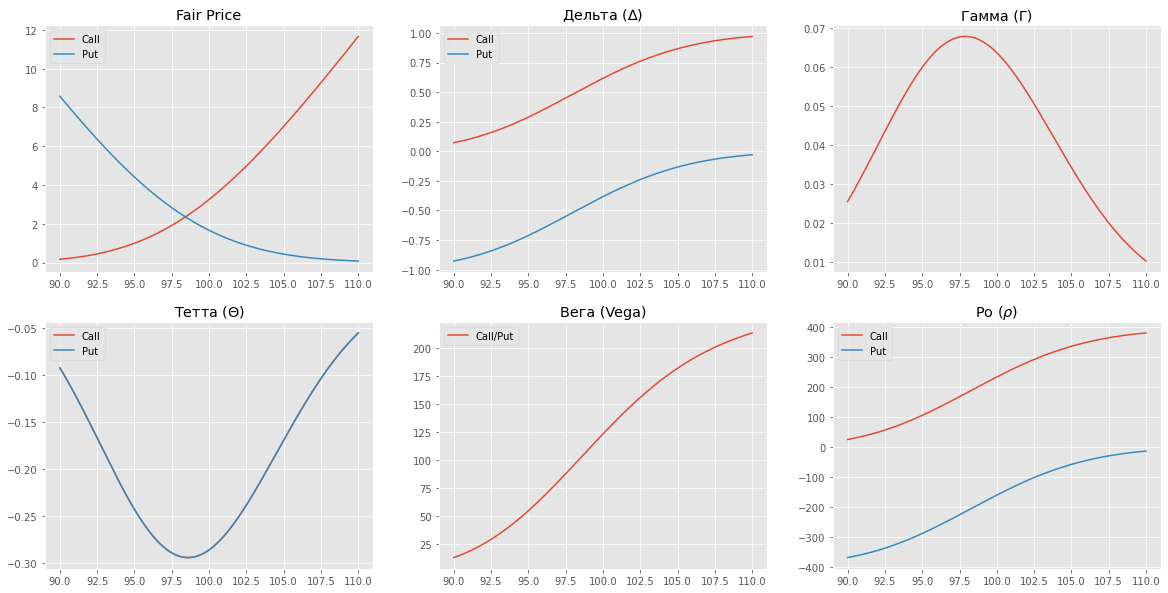

In [227]:
def draw_greeks():
    plt.figure(figsize=(20, 10))
    # Fair Price
    plt.subplot(2, 3, 1)
    plt.plot(interval, fair_value_call_arr, label='Call')
    plt.plot(interval, fair_value_put_arr, label='Put')
    plt.legend(loc='best')
    plt.title('Fair Price')
    # Дельта
    plt.subplot(2, 3, 2)
    plt.plot(interval, delta_call_arr, label='Call')
    plt.plot(interval, delta_put_arr, label='Put')
    plt.legend(loc='best')
    plt.title('Дельта ($∆$)')
    # Дельта
    plt.subplot(2, 3, 3)
    plt.plot(interval, gamma_arr)
    plt.title('Гамма (Γ)')
    # Тетта
    plt.subplot(2, 3, 4)
    plt.plot(interval, tetha_call_arr, label='Call')
    plt.plot(interval, tetha_put_arr, label='Put')
    plt.legend(loc='best')
    plt.title('Тетта ($Θ$)')
    # Вега
    plt.subplot(2, 3, 5)
    plt.plot(interval, vega_arr,label='Сall/Put')
    plt.legend(loc='best')
    plt.title('Вега (Vega)')
    # Ро
    plt.subplot(2, 3, 6)
    plt.plot(interval, ro_call_arr, label='Call')
    plt.plot(interval, ro_put_arr, label='Put')
    plt.legend(loc='best')
    plt.title('Ро ($ρ$)')
draw_greeks()


Исследуем каждый из греков на чувствительность к параметрам и сделаем вывод по результирующим графикам

Исследуем Дельту на чувствительность к параметрам

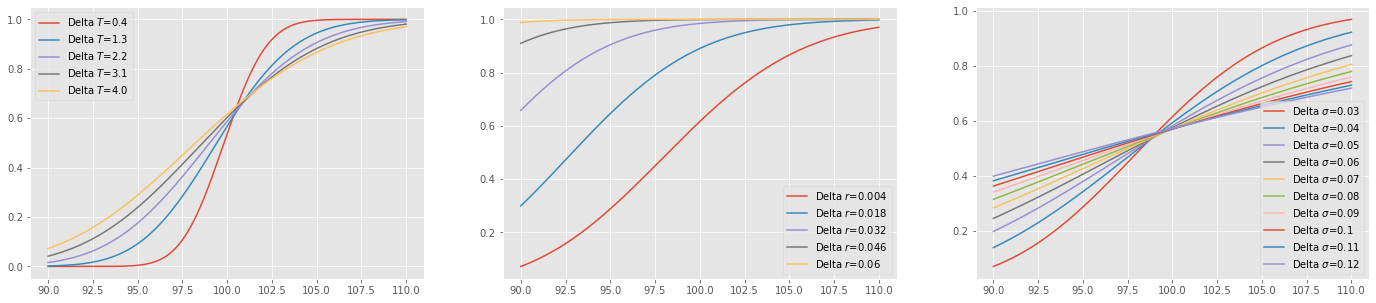

In [202]:
def delta_show():
    """Различные значения времени"""
    plt.figure(figsize=(24, 5))
    t = np.linspace(T*0.1,T,num=5)
    plt.subplot(1, 3, 1)
    for i in t:
        d_call_arr = [delta(s,t=i ,mode='call')  for s in interval]
        plt.plot(interval, d_call_arr, label=f'Delta $T$={i}')
    plt.legend(loc='best')

    r = t = np.linspace(R,R*15,num=5)
    plt.subplot(1, 3, 2)
    for i in r:
        d_call_arr = [delta(s,r=i ,mode='call')  for s in interval]
        plt.plot(interval, d_call_arr, label=f'Delta $r$={i}')
    plt.legend(loc='best')

    plt.subplot(1, 3, 3)
    sigma = np.linspace(SIGMA,SIGMA*4,num=10)
    for i in sigma:
        d_call_arr = [delta(s,sigma=i ,mode='call')  for s in interval]
        plt.plot(interval, d_call_arr, label=f'Delta $\sigma$={i}')
    plt.legend(loc='best')
delta_show()

Исследуем Гамму на чувствительность

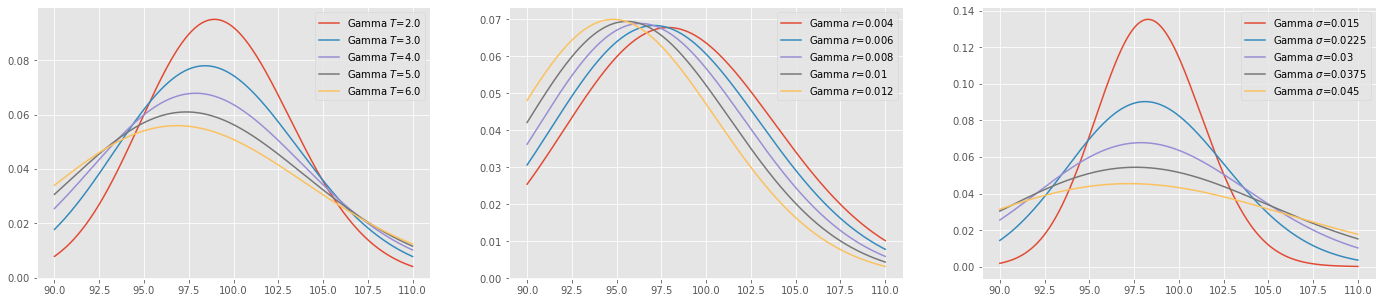

In [211]:
def gamma_show():
    """Различные значения времени"""
    plt.figure(figsize=(24, 5))
    t = np.linspace(T*0.5,T*1.5,num=5)
    plt.subplot(1, 3, 1)
    for i in t:
        d_call_arr = [gamma(s,t=i)  for s in interval]
        plt.plot(interval, d_call_arr, label=f'Gamma $T$={i}')
    plt.legend(loc='best')

    r = np.linspace(R,R*3,num=5)
    plt.subplot(1, 3, 2)
    for i in r:
        d_call_arr = [gamma(s,r=i)  for s in interval]
        plt.plot(interval, d_call_arr, label=f'Gamma $r$={i}')
    plt.legend(loc='best')

    plt.subplot(1, 3, 3)
    sigma = np.linspace(SIGMA*0.5,SIGMA*1.5,num=5)
    for i in sigma:
        d_call_arr = [gamma(s,sigma=i )  for s in interval]
        plt.plot(interval, d_call_arr, label=f'Gamma $\sigma$={i}')
    plt.legend(loc='best')
gamma_show()

Исследуем Тетту на чувствительность

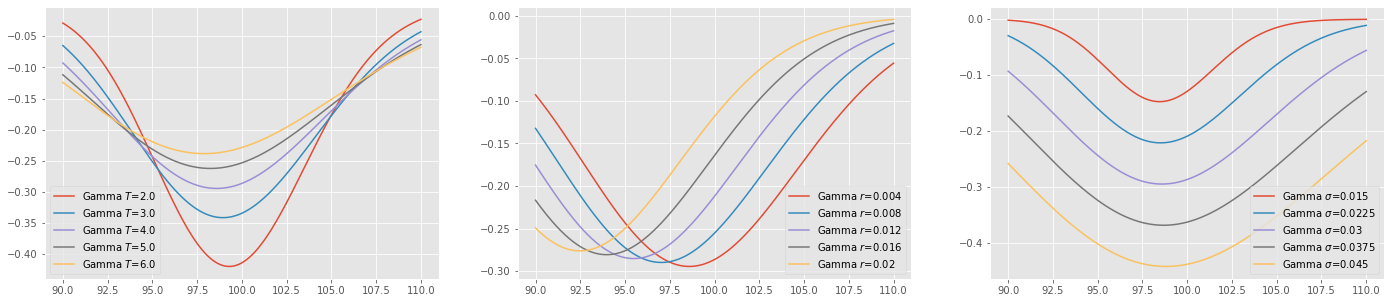

In [212]:
def theta_show():
    """Различные значения времени"""
    plt.figure(figsize=(24, 5))
    t = np.linspace(T*0.5,T*1.5,num=5)
    plt.subplot(1, 3, 1)
    for i in t:
        d_call_arr = [tetha(s,t=i)  for s in interval]
        plt.plot(interval, d_call_arr, label=f'Gamma $T$={i}')
    plt.legend(loc='best')

    r = np.linspace(R,R*5,num=5)
    plt.subplot(1, 3, 2)
    for i in r:
        d_call_arr = [tetha(s,r=i)  for s in interval]
        plt.plot(interval, d_call_arr, label=f'Gamma $r$={i}')
    plt.legend(loc='best')

    plt.subplot(1, 3, 3)
    sigma = np.linspace(SIGMA*0.5,SIGMA*1.5,num=5)
    for i in sigma:
        d_call_arr = [tetha(s,sigma=i )  for s in interval]
        plt.plot(interval, d_call_arr, label=f'Gamma $\sigma$={i}')
    plt.legend(loc='best')
theta_show()

Исследуем Вегу на чувствительность

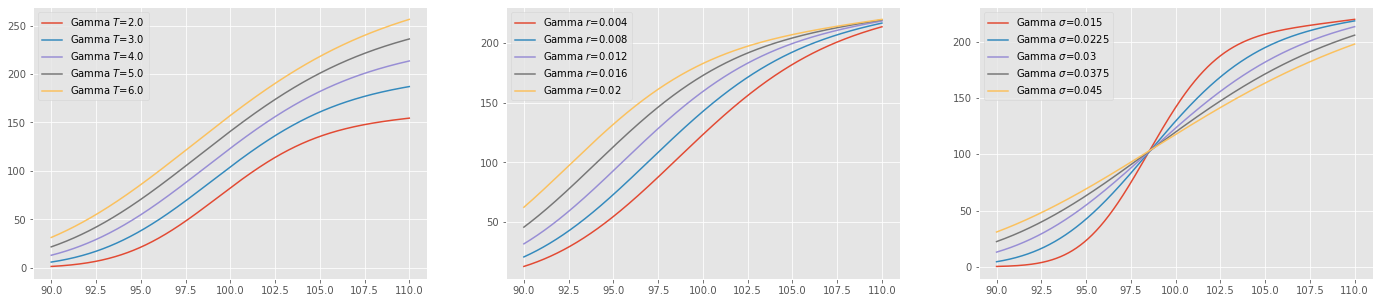

In [213]:
def vega_show():
    """Различные значения времени"""
    plt.figure(figsize=(24, 5))
    t = np.linspace(T*0.5,T*1.5,num=5)
    plt.subplot(1, 3, 1)
    for i in t:
        d_call_arr = [vega(s,t=i)  for s in interval]
        plt.plot(interval, d_call_arr, label=f'Gamma $T$={i}')
    plt.legend(loc='best')

    r = np.linspace(R,R*5,num=5)
    plt.subplot(1, 3, 2)
    for i in r:
        d_call_arr = [vega(s,r=i)  for s in interval]
        plt.plot(interval, d_call_arr, label=f'Gamma $r$={i}')
    plt.legend(loc='best')

    plt.subplot(1, 3, 3)
    sigma = np.linspace(SIGMA*0.5,SIGMA*1.5,num=5)
    for i in sigma:
        d_call_arr = [vega(s,sigma=i )  for s in interval]
        plt.plot(interval, d_call_arr, label=f'Gamma $\sigma$={i}')
    plt.legend(loc='best')
vega_show()

Исследуем ро на чувствительность

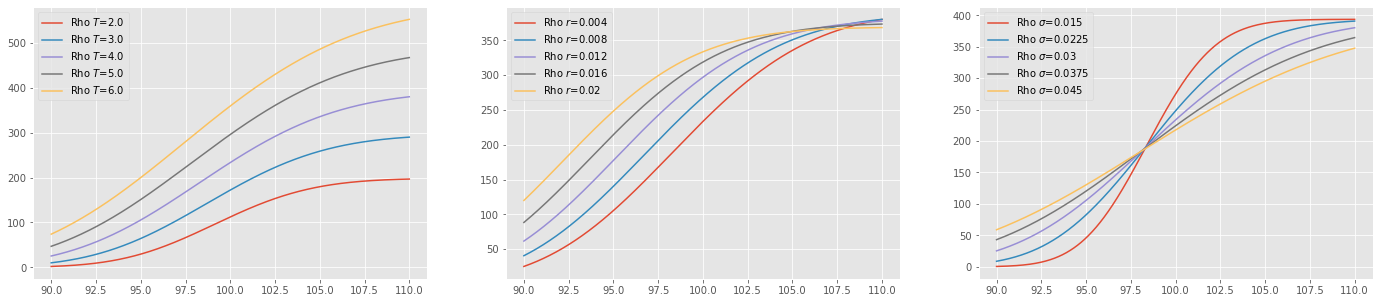

In [214]:
def rho_show():
    """Различные значения времени"""
    plt.figure(figsize=(24, 5))
    t = np.linspace(T*0.5,T*1.5,num=5)
    plt.subplot(1, 3, 1)
    for i in t:
        d_call_arr = [ro(s,t=i)  for s in interval]
        plt.plot(interval, d_call_arr, label=f'Rho $T$={i}')
    plt.legend(loc='best')

    r = np.linspace(R,R*5,num=5)
    plt.subplot(1, 3, 2)
    for i in r:
        d_call_arr = [ro(s,r=i)  for s in interval]
        plt.plot(interval, d_call_arr, label=f'Rho $r$={i}')
    plt.legend(loc='best')

    plt.subplot(1, 3, 3)
    sigma = np.linspace(SIGMA*0.5,SIGMA*1.5,num=5)
    for i in sigma:
        d_call_arr = [ro(s,sigma=i )  for s in interval]
        plt.plot(interval, d_call_arr, label=f'Rho $\sigma$={i}')
    plt.legend(loc='best')
rho_show()

<u>Построение Put Call Parity</u>

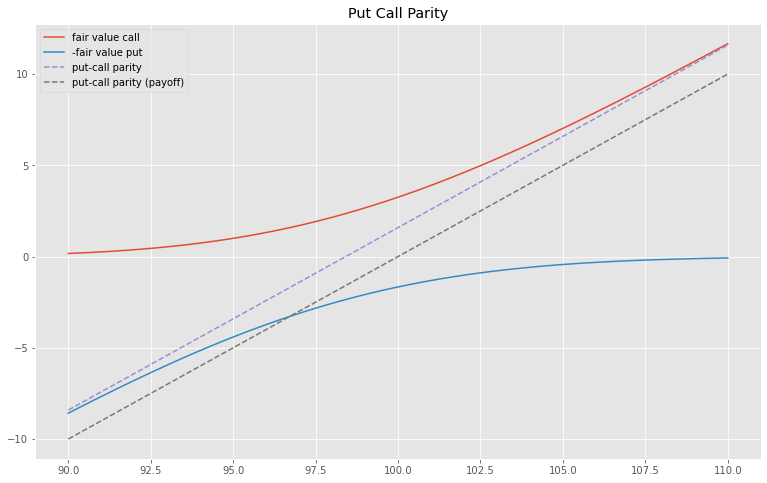

In [217]:

plt.figure(figsize=(13, 8))
plt.title('Put Call Parity')
# fair put
plt.plot(interval, fair_value_call_arr, label='fair value call')
# fair call
plt.plot(interval, -fair_value_put_arr, label='-fair value put')
# put call
plt.plot(interval, interval-STRIKE_PRICE*np.exp((-R)*T),
         label='put-call parity', linestyle='dashed')

plt.plot(interval, payoff_call_arr - payoff_put_arr,
         label='put-call parity (payoff)', linestyle='dashed')

plt.legend(loc='best')
plt.show()
